In [1]:
import pandas as pd
from bs4 import BeautifulSoup
from mplsoccer import Pitch
from mplsoccer import VerticalPitch
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [2]:
games = {"SDSU":"""<div class="teamstats__Xg-module__field___3XEZt"><div class="teamstats__Xg-module__shots___5NSUA"><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__gk_save___3l9qu" style="width: 1.78383%; left: 67%; top: 26%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>1</span><div class="teamstats__Xg-module__tooltip___2XyAz">2. M. Lane, 1' <br>xG 0.06</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__wide___3T4PL" style="width: 1.92744%; left: 60%; top: 40%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>2</span><div class="teamstats__Xg-module__tooltip___2XyAz">11. D. Castro, 16' <br>xG 0.08</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__wide___3T4PL" style="width: 0.554832%; left: 30%; top: 50%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>3</span><div class="teamstats__Xg-module__tooltip___2XyAz">16. T. Coker, 17' <br>xG &lt;0.01</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__wide___3T4PL" style="width: 0.218509%; left: 33%; top: 60%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>4</span><div class="teamstats__Xg-module__tooltip___2XyAz">12. O. Sekimoto, 19' <br>xG &lt;0.01</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__gk_save___3l9qu" style="width: 1.26332%; left: 27%; top: 44%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>5</span><div class="teamstats__Xg-module__tooltip___2XyAz">16. T. Coker, 23' <br>xG 0.03</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__wide___3T4PL" style="width: 0.615405%; left: 67%; top: 50%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>6</span><div class="teamstats__Xg-module__tooltip___2XyAz">11. D. Castro, 24' <br>xG &lt;0.01</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__gk_save___3l9qu" style="width: 0.892604%; left: 41%; top: 54%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>7</span><div class="teamstats__Xg-module__tooltip___2XyAz">13. A. Nakamoto, 43' <br>xG 0.02</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__gk_save___3l9qu" style="width: 1.17775%; left: 28%; top: 46%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>8</span><div class="teamstats__Xg-module__tooltip___2XyAz">16. T. Coker, 48' <br>xG 0.03</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__wide___3T4PL" style="width: 4.08567%; left: 36%; top: 8%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>9</span><div class="teamstats__Xg-module__tooltip___2XyAz">5. E. Gaines-Ramos, 48' <br>xG 0.34</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__gk_save___3l9qu" style="width: 2.50878%; left: 57%; top: 22%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>10</span><div class="teamstats__Xg-module__tooltip___2XyAz">13. A. Nakamoto, 53' <br>xG 0.13</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__gk_save___3l9qu" style="width: 2.10408%; left: 35%; top: 36%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>11</span><div class="teamstats__Xg-module__tooltip___2XyAz">5. E. Gaines-Ramos, 54' <br>xG 0.09</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__wide___3T4PL" style="width: 2.25593%; left: 59%; top: 66%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>12</span><div class="teamstats__Xg-module__tooltip___2XyAz">12. O. Sekimoto, 54' <br>xG 0.10</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__wide___3T4PL" style="width: 0.879498%; left: 67%; top: 56%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>13</span><div class="teamstats__Xg-module__tooltip___2XyAz">12. O. Sekimoto, 57' <br>xG 0.02</div></div></div><svg viewBox="0 0 470 353"><g><marker id="arrow_2297025599" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.3548331142139891)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.3548331142139891)" marker-end="url(#arrow_2297025599)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="308.78" y1="105.1" x2="230.66" y2="18"></line></g><g><marker id="arrow_2297026003" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.2804739285880373)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.2804739285880373)" marker-end="url(#arrow_2297026003)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="135.18" y1="165.4" x2="219.81" y2="18"></line></g><g><marker id="arrow_2297026526" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.2275148214914643)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.2275148214914643)" marker-end="url(#arrow_2297026526)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="195.94" y1="198.9" x2="230.66" y2="18"></line></g><g><marker id="arrow_2297026623" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.2682497601781352)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.2682497601781352)" marker-end="url(#arrow_2297026623)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="139.51999999999998" y1="172.1" x2="219.81" y2="18"></line></g><g><marker id="arrow_2297026735" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.45839752287090374)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.45839752287090374)" marker-end="url(#arrow_2297026735)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="265.38" y1="91.7" x2="235" y2="18"></line></g><g><marker id="arrow_2297026770" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.4005834895665429)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.4005834895665429)" marker-end="url(#arrow_2297026770)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="169.9" y1="138.6" x2="235" y2="18"></line></g></svg></div>""","WS":"""<div class="teamstats__Xg-module__field___3XEZt"><div class="teamstats__Xg-module__shots___5NSUA"><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__wide___3T4PL" style="width: 0.40852%; left: 62%; top: 40%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>1</span><div class="teamstats__Xg-module__tooltip___2XyAz">8. M. Santa Cruz, 5' <br>xG &lt;0.01</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__wide___3T4PL" style="width: 1.20929%; left: 31%; top: 30%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>2</span><div class="teamstats__Xg-module__tooltip___2XyAz">6. A. Watts, 25' <br>xG 0.03</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__wide___3T4PL" style="width: 0.632984%; left: 49%; top: 50%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>3</span><div class="teamstats__Xg-module__tooltip___2XyAz">6. A. Watts, 26' <br>xG &lt;0.01</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__wide___3T4PL" style="width: 0.766332%; left: 68%; top: 40%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>4</span><div class="teamstats__Xg-module__tooltip___2XyAz">23. R. Reed, 32' <br>xG 0.01</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__goal___rmSoj" style="width: 4.14471%; left: 48%; top: 20%; background-color: rgb(0, 0, 0); border-color: rgb(255, 255, 255); color: rgb(255, 255, 255);"><span>5</span><div class="teamstats__Xg-module__tooltip___2XyAz">23. R. Reed, 38' <br>xG 0.35</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__wide___3T4PL" style="width: 2.34262%; left: 68%; top: 20%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>6</span><div class="teamstats__Xg-module__tooltip___2XyAz">10. N. Clark, 41' <br>xG 0.11</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__wide___3T4PL" style="width: 0.999872%; left: 29%; top: 38%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>8</span><div class="teamstats__Xg-module__tooltip___2XyAz">23. R. Reed, 47' <br>xG 0.02</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__wide___3T4PL" style="width: 2.24687%; left: 59%; top: 38%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>9</span><div class="teamstats__Xg-module__tooltip___2XyAz">3. A. Berge, 50' <br>xG 0.10</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__wide___3T4PL" style="width: 2.72031%; left: 49%; top: 14%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>10</span><div class="teamstats__Xg-module__tooltip___2XyAz">21. K. Campbell, 53' <br>xG 0.15</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__post___13IUL" style="width: 1.97733%; left: 39%; top: 22%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>11</span><div class="teamstats__Xg-module__tooltip___2XyAz">2. R. Tappan, 67' <br>xG 0.08</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__wide___3T4PL" style="width: 3.82413%; left: 61%; top: 18%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>12</span><div class="teamstats__Xg-module__tooltip___2XyAz">26. P.Price, 67' <br>xG 0.30</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__wide___3T4PL" style="width: 2.56504%; left: 57%; top: 8%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>14</span><div class="teamstats__Xg-module__tooltip___2XyAz">10. N. Clark, 72' <br>xG 0.13</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__gk_save___3l9qu" style="width: 2.71061%; left: 41%; top: 28%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>15</span><div class="teamstats__Xg-module__tooltip___2XyAz">10. N. Clark, 77' <br>xG 0.15</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__wide___3T4PL" style="width: 1.68002%; left: 42%; top: 24%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>16</span><div class="teamstats__Xg-module__tooltip___2XyAz">10. N. Clark, 78' <br>xG 0.06</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__wide___3T4PL" style="width: 0.427558%; left: 69%; top: 50%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>17</span><div class="teamstats__Xg-module__tooltip___2XyAz">33. J.Studer, 81' <br>xG &lt;0.01</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__gk_save___3l9qu" style="width: 1.35586%; left: 49%; top: 26%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>18</span><div class="teamstats__Xg-module__tooltip___2XyAz">9.  . Kotschau, 84' <br>xG 0.04</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__wide___3T4PL" style="width: 1.67603%; left: 50%; top: 40%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>19</span><div class="teamstats__Xg-module__tooltip___2XyAz">9.  . Kotschau, 90+1' <br>xG 0.06</div></div></div><svg viewBox="0 0 470 353"><g><marker id="arrow_2291318274" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.15835998886223335)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.15835998886223335)" marker-end="url(#arrow_2291318274)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="287.08" y1="152" x2="196.62014925373134" y2="5"></line></g><g><marker id="arrow_2291318622" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.2727557052603473)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.2727557052603473)" marker-end="url(#arrow_2291318622)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="152.54" y1="118.5" x2="245.66646766169154" y2="5"></line></g><g><marker id="arrow_2291318653" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.1904262362370568)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.1904262362370568)" marker-end="url(#arrow_2291318653)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="230.66" y1="185.5" x2="268.0746865671642" y2="5"></line></g><g><marker id="arrow_2291318754" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.20947599188863283)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.20947599188863283)" marker-end="url(#arrow_2291318754)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="313.12" y1="152" x2="235" y2="18"></line></g><g><marker id="arrow_2291318850" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.69210207278813)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.69210207278813)" marker-end="url(#arrow_2291318850)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="226.32" y1="85" x2="235" y2="18"></line></g><g><marker id="arrow_2291318882" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.4346595743438397)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.4346595743438397)" marker-end="url(#arrow_2291318882)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="313.12" y1="85" x2="219.84238805970148" y2="5"></line></g><g><marker id="arrow_2291319015" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.24283887321034145)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.24283887321034145)" marker-end="url(#arrow_2291319015)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="143.86" y1="145.3" x2="235" y2="18"></line></g><g><marker id="arrow_2291319052" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.4209810838663238)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.4209810838663238)" marker-end="url(#arrow_2291319052)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="274.06" y1="145.3" x2="269.72" y2="18"></line></g><g><marker id="arrow_2291319129" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.48861543638924076)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.48861543638924076)" marker-end="url(#arrow_2291319129)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="230.66" y1="64.9" x2="197.4020895522388" y2="5"></line></g><g><marker id="arrow_2291319309" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.38247640043019526)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.38247640043019526)" marker-end="url(#arrow_2291319309)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="187.26" y1="91.7" x2="235" y2="18"></line></g><g><marker id="arrow_2291319310" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.6463047050868224)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.6463047050868224)" marker-end="url(#arrow_2291319310)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="282.74" y1="78.3" x2="187.77820895522387" y2="5"></line></g><g><marker id="arrow_2291319373" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.4664345630532142)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.4664345630532142)" marker-end="url(#arrow_2291319373)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="265.38" y1="44.8" x2="265.38" y2="5"></line></g><g><marker id="arrow_2291319450" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.48722996681558617)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.48722996681558617)" marker-end="url(#arrow_2291319450)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="195.94" y1="111.8" x2="219.81" y2="18"></line></g><g><marker id="arrow_2291319456" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.3400031643541393)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.3400031643541393)" marker-end="url(#arrow_2291319456)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="200.28" y1="98.4" x2="205.32174129353234" y2="5"></line></g><g><marker id="arrow_2291319498" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.1610797699733717)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.1610797699733717)" marker-end="url(#arrow_2291319498)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="317.46" y1="185.5" x2="269.72" y2="18"></line></g><g><marker id="arrow_2291319889" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.29369415246723374)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.29369415246723374)" marker-end="url(#arrow_2291319889)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="230.66" y1="105.1" x2="235" y2="18"></line></g><g><marker id="arrow_2291319638" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.33943293633082317)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.33943293633082317)" marker-end="url(#arrow_2291319638)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="235" y1="152" x2="268.3273134328358" y2="5"></line></g></svg></div>""","Idaho":"""<div class="teamstats__Xg-module__field___3XEZt"><div class="teamstats__Xg-module__shots___5NSUA"><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__gk_save___3l9qu" style="width: 1.13075%; left: 65%; top: 30%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>1</span><div class="teamstats__Xg-module__tooltip___2XyAz">12. A. Farley, 4' <br>xG 0.03</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__post___13IUL" style="width: 1.65523%; left: 24%; top: 62%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>2</span><div class="teamstats__Xg-module__tooltip___2XyAz">22. S. Gonzales, 23' <br>xG 0.06</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__wide___3T4PL" style="width: 3.60377%; left: 44%; top: 16%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>3</span><div class="teamstats__Xg-module__tooltip___2XyAz">12. A. Farley, 23' <br>xG 0.27</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__gk_save___3l9qu" style="width: 2.19111%; left: 71%; top: 28%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>4</span><div class="teamstats__Xg-module__tooltip___2XyAz">21. M. Lasher, 24' <br>xG 0.10</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__goal___rmSoj" style="width: 2.29301%; left: 36%; top: 40%; background-color: rgb(0, 0, 0); border-color: rgb(255, 255, 255); color: rgb(255, 255, 255);"><span>5</span><div class="teamstats__Xg-module__tooltip___2XyAz">44. M. Schoesler, 24' <br>xG 0.11</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__gk_save___3l9qu" style="width: 1.06381%; left: 74%; top: 46%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>7</span><div class="teamstats__Xg-module__tooltip___2XyAz">23. N. Alvarez, 69' <br>xG 0.02</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__goal___rmSoj" style="width: 2.32012%; left: 49%; top: 28%; background-color: rgb(0, 0, 0); border-color: rgb(255, 255, 255); color: rgb(255, 255, 255);"><span>8</span><div class="teamstats__Xg-module__tooltip___2XyAz">44. M. Schoesler, 73' <br>xG 0.11</div></div></div><svg viewBox="0 0 470 353"><g><marker id="arrow_2296536664" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.2615363989941586)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.2615363989941586)" marker-end="url(#arrow_2296536664)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="300.1" y1="118.5" x2="235" y2="18"></line></g><g><marker id="arrow_2296535417" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.33646089274973145)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.33646089274973145)" marker-end="url(#arrow_2296535417)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="122.16" y1="225.7" x2="235" y2="18"></line></g><g><marker id="arrow_2296536665" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.6148247954401574)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.6148247954401574)" marker-end="url(#arrow_2296536665)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="208.96" y1="71.6" x2="203.5673880597015" y2="5"></line></g><g><marker id="arrow_2296535434" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.41301502471926166)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.41301502471926166)" marker-end="url(#arrow_2296535434)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="326.14" y1="111.8" x2="245.85" y2="18"></line></g><g><marker id="arrow_2296535437" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.4275730167458852)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.4275730167458852)" marker-end="url(#arrow_2296535437)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="174.24" y1="152" x2="230.66" y2="18"></line></g><g><marker id="arrow_2296536661" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.2519722810251922)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.2519722810251922)" marker-end="url(#arrow_2296536661)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="339.16" y1="172.1" x2="235" y2="18"></line></g><g><marker id="arrow_2296536521" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.4314457949650289)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.4314457949650289)" marker-end="url(#arrow_2296536521)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="230.66" y1="111.8" x2="235" y2="18"></line></g></svg></div>""","CBU":"""<div class="teamstats__Xg-module__field___3XEZt"><div class="teamstats__Xg-module__shots___5NSUA"><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__gk_save___3l9qu" style="width: 1.27097%; left: 36%; top: 30%; background-color: rgb(0, 0, 0); border-color: rgb(255, 255, 255); color: rgb(255, 255, 255);"><span>1</span><div class="teamstats__Xg-module__tooltip___2XyAz">7. J. Ramirez, 51' <br>xG 0.03</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__wide___3T4PL" style="width: 3.3511%; left: 43%; top: 14%; background-color: rgb(0, 0, 0); border-color: rgb(255, 255, 255); color: rgb(255, 255, 255);"><span>4</span><div class="teamstats__Xg-module__tooltip___2XyAz">4. M. Witz, 61' <br>xG 0.23</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__goal___rmSoj" style="width: 1.41055%; left: 29%; top: 44%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>5</span><div class="teamstats__Xg-module__tooltip___2XyAz">8. K. Hauck, 66' <br>xG 0.04</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__wide___3T4PL" style="width: 2.58691%; left: 61%; top: 30%; background-color: rgb(0, 0, 0); border-color: rgb(255, 255, 255); color: rgb(255, 255, 255);"><span>6</span><div class="teamstats__Xg-module__tooltip___2XyAz">20.  . Allen, 72' <br>xG 0.14</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__wide___3T4PL" style="width: 2.60047%; left: 39%; top: 10%; background-color: rgb(0, 0, 0); border-color: rgb(255, 255, 255); color: rgb(255, 255, 255);"><span>8</span><div class="teamstats__Xg-module__tooltip___2XyAz">8. K. Hauck, 73' <br>xG 0.14</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__gk_save___3l9qu" style="width: 0.938356%; left: 27%; top: 32%; background-color: rgb(0, 0, 0); border-color: rgb(255, 255, 255); color: rgb(255, 255, 255);"><span>9</span><div class="teamstats__Xg-module__tooltip___2XyAz">4. M. Witz, 90+4' <br>xG 0.02</div></div></div><svg viewBox="0 0 470 353"><g><marker id="arrow_2283032224" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.2815667257511684)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.2815667257511684)" marker-end="url(#arrow_2283032224)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="174.24" y1="118.5" x2="219.81" y2="18"></line></g><g><marker id="arrow_2283032524" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.5787289513910768)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.5787289513910768)" marker-end="url(#arrow_2283032524)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="204.62" y1="64.9" x2="243.42089552238807" y2="5"></line></g><g><marker id="arrow_2283032584" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.3015078063004012)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.3015078063004012)" marker-end="url(#arrow_2283032584)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="143.86" y1="165.4" x2="245.85" y2="18"></line></g><g><marker id="arrow_2283032645" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.46955851160540196)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.46955851160540196)" marker-end="url(#arrow_2283032645)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="282.74" y1="118.5" x2="235" y2="18"></line></g><g><marker id="arrow_2283032650" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.47149638369706914)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.47149638369706914)" marker-end="url(#arrow_2283032650)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="187.26" y1="51.5" x2="235" y2="18"></line></g><g><marker id="arrow_2283032853" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.23405083028463494)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.23405083028463494)" marker-end="url(#arrow_2283032853)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="135.18" y1="125.2" x2="250.19" y2="18"></line></g></svg></div>""","Nevada":"""<div class="teamstats__Xg-module__field___3XEZt"><div class="teamstats__Xg-module__shots___5NSUA"><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__gk_save___3l9qu" style="width: 1.52267%; left: 55%; top: 68%; background-color: rgb(0, 0, 0); border-color: rgb(255, 255, 255); color: rgb(255, 255, 255);"><span>2</span><div class="teamstats__Xg-module__tooltip___2XyAz">21. P. Murphy, 32' <br>xG 0.05</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__wide___3T4PL" style="width: 1.64985%; left: 45%; top: 26%; background-color: rgb(0, 0, 0); border-color: rgb(255, 255, 255); color: rgb(255, 255, 255);"><span>3</span><div class="teamstats__Xg-module__tooltip___2XyAz">32. E. Wees, 46' <br>xG 0.06</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__wide___3T4PL" style="width: 2.23011%; left: 62%; top: 30%; background-color: rgb(0, 0, 0); border-color: rgb(255, 255, 255); color: rgb(255, 255, 255);"><span>4</span><div class="teamstats__Xg-module__tooltip___2XyAz">32. E. Wees, 49' <br>xG 0.10</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__wide___3T4PL" style="width: 1.74623%; left: 39%; top: 22%; background-color: rgb(0, 0, 0); border-color: rgb(255, 255, 255); color: rgb(255, 255, 255);"><span>6</span><div class="teamstats__Xg-module__tooltip___2XyAz">32. E. Wees, 82' <br>xG 0.06</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__gk_save___3l9qu" style="width: 2.53294%; left: 39%; top: 16%; background-color: rgb(0, 0, 0); border-color: rgb(255, 255, 255); color: rgb(255, 255, 255);"><span>7</span><div class="teamstats__Xg-module__tooltip___2XyAz">26. A. Souza, 88' <br>xG 0.13</div></div></div><svg viewBox="0 0 470 353"><g><marker id="arrow_2274851832" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.3175238508761741)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.3175238508761741)" marker-end="url(#arrow_2274851832)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="256.7" y1="245.8" x2="230.66" y2="18"></line></g><g><marker id="arrow_2274852090" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.3356923986894783)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.3356923986894783)" marker-end="url(#arrow_2274852090)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="213.3" y1="105.1" x2="203.3244776119403" y2="5"></line></g><g><marker id="arrow_2274852120" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.4185865141527494)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.4185865141527494)" marker-end="url(#arrow_2274852120)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="287.08" y1="118.5" x2="228.26328358208954" y2="5"></line></g><g><marker id="arrow_2274852717" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.34946095786715803)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.34946095786715803)" marker-end="url(#arrow_2274852717)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="187.26" y1="91.7" x2="235" y2="18"></line></g><g><marker id="arrow_2274852876" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.46184852853093106)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.46184852853093106)" marker-end="url(#arrow_2274852876)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="187.26" y1="71.6" x2="230.66" y2="18"></line></g></svg></div>""","Pepperdine":"""<div class="teamstats__Xg-module__field___3XEZt"><div class="teamstats__Xg-module__shots___5NSUA"><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__gk_save___3l9qu" style="width: 2.00346%; left: 56%; top: 52%; background-color: rgb(0, 0, 0); border-color: rgb(255, 255, 255); color: rgb(255, 255, 255);"><span>1</span><div class="teamstats__Xg-module__tooltip___2XyAz">9. T. Laparl, 4' <br>xG 0.08</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__wide___3T4PL" style="width: 1.84248%; left: 67%; top: 44%; background-color: rgb(0, 0, 0); border-color: rgb(255, 255, 255); color: rgb(255, 255, 255);"><span>2</span><div class="teamstats__Xg-module__tooltip___2XyAz">20. T. Waldeck, 7' <br>xG 0.07</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__wide___3T4PL" style="width: 0.241383%; left: 52%; top: 54%; background-color: rgb(0, 0, 0); border-color: rgb(255, 255, 255); color: rgb(255, 255, 255);"><span>3</span><div class="teamstats__Xg-module__tooltip___2XyAz">21. K. Campbell, 10' <br>xG &lt;0.01</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__gk_save___3l9qu" style="width: 0.743564%; left: 63%; top: 46%; background-color: rgb(0, 0, 0); border-color: rgb(255, 255, 255); color: rgb(255, 255, 255);"><span>4</span><div class="teamstats__Xg-module__tooltip___2XyAz">20. T. Waldeck, 15' <br>xG 0.01</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__wide___3T4PL" style="width: 2.83182%; left: 63%; top: 24%; background-color: rgb(0, 0, 0); border-color: rgb(255, 255, 255); color: rgb(255, 255, 255);"><span>5</span><div class="teamstats__Xg-module__tooltip___2XyAz">22. J. Quinonez, 16' <br>xG 0.16</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__wide___3T4PL" style="width: 1.01923%; left: 49%; top: 50%; background-color: rgb(0, 0, 0); border-color: rgb(255, 255, 255); color: rgb(255, 255, 255);"><span>6</span><div class="teamstats__Xg-module__tooltip___2XyAz">11. T. Wynalda, 21' <br>xG 0.02</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__wide___3T4PL" style="width: 0.958872%; left: 36%; top: 34%; background-color: rgb(0, 0, 0); border-color: rgb(255, 255, 255); color: rgb(255, 255, 255);"><span>7</span><div class="teamstats__Xg-module__tooltip___2XyAz">20. T. Waldeck, 37' <br>xG 0.02</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__goal___rmSoj" style="width: 1.63418%; left: 48%; top: 44%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>8</span><div class="teamstats__Xg-module__tooltip___2XyAz">17. A. Verplancke, 38' <br>xG 0.05</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__wide___3T4PL" style="width: 1.81437%; left: 50%; top: 46%; background-color: rgb(0, 0, 0); border-color: rgb(255, 255, 255); color: rgb(255, 255, 255);"><span>9</span><div class="teamstats__Xg-module__tooltip___2XyAz">17. A. Verplancke, 56' <br>xG 0.07</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__gk_save___3l9qu" style="width: 2.09694%; left: 31%; top: 14%; background-color: rgb(0, 0, 0); border-color: rgb(255, 255, 255); color: rgb(255, 255, 255);"><span>11</span><div class="teamstats__Xg-module__tooltip___2XyAz">11. T. Wynalda, 68' <br>xG 0.09</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__gk_save___3l9qu" style="width: 5.24961%; left: 46%; top: 12%; background-color: rgb(0, 0, 0); border-color: rgb(255, 255, 255); color: rgb(255, 255, 255);"><span>12</span><div class="teamstats__Xg-module__tooltip___2XyAz">20. T. Waldeck, 68' <br>xG 0.56</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__wide___3T4PL" style="width: 2.40161%; left: 43%; top: 20%; background-color: rgb(0, 0, 0); border-color: rgb(255, 255, 255); color: rgb(255, 255, 255);"><span>13</span><div class="teamstats__Xg-module__tooltip___2XyAz">11. T. Wynalda, 77' <br>xG 0.12</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__gk_save___3l9qu" style="width: 0.253936%; left: 37%; top: 50%; background-color: rgb(0, 0, 0); border-color: rgb(255, 255, 255); color: rgb(255, 255, 255);"><span>14</span><div class="teamstats__Xg-module__tooltip___2XyAz">12. C. Coleman, 78' <br>xG &lt;0.01</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__wide___3T4PL" style="width: 1.97581%; left: 58%; top: 24%; background-color: rgb(0, 0, 0); border-color: rgb(255, 255, 255); color: rgb(255, 255, 255);"><span>15</span><div class="teamstats__Xg-module__tooltip___2XyAz">20. T. Waldeck, 87' <br>xG 0.08</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__gk_save___3l9qu" style="width: 1.34986%; left: 45%; top: 56%; background-color: rgb(0, 0, 0); border-color: rgb(255, 255, 255); color: rgb(255, 255, 255);"><span>16</span><div class="teamstats__Xg-module__tooltip___2XyAz">22. J. Quinonez, 90' <br>xG 0.04</div></div></div><svg viewBox="0 0 470 353"><g><marker id="arrow_2270698877" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.3862083674528053)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.3862083674528053)" marker-end="url(#arrow_2270698877)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="261.03999999999996" y1="192.2" x2="230.66" y2="18"></line></g><g><marker id="arrow_2270699105" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.20622346162689295)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.20622346162689295)" marker-end="url(#arrow_2270699105)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="291.42" y1="172.1" x2="230.66" y2="18"></line></g><g><marker id="arrow_2270699537" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.3334541351100897)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.3334541351100897)" marker-end="url(#arrow_2270699537)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="226.32" y1="165.4" x2="250.19" y2="18"></line></g><g><marker id="arrow_2270700065" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.39956264853949996)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.39956264853949996)" marker-end="url(#arrow_2270700065)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="152.54" y1="64.9" x2="219.81" y2="18"></line></g><g><marker id="arrow_2270700435" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.8499448438385319)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.8499448438385319)" marker-end="url(#arrow_2270700435)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="217.64" y1="58.2" x2="235" y2="18"></line></g><g><marker id="arrow_2270700245" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.13627651581946645)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.13627651581946645)" marker-end="url(#arrow_2270700245)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="178.58" y1="185.5" x2="235" y2="18"></line></g><g><marker id="arrow_2270700404" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.2928369324066321)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.2928369324066321)" marker-end="url(#arrow_2270700404)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="213.3" y1="205.6" x2="235" y2="18"></line></g></svg></div>""","USF":"""<div class="teamstats__Xg-module__field___3XEZt"><div class="teamstats__Xg-module__shots___5NSUA"><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__gk_save___3l9qu" style="width: 1.69306%; left: 33%; top: 38%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>1</span><div class="teamstats__Xg-module__tooltip___2XyAz">30. A. Carpio, 6' <br>xG 0.06</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__gk_save___3l9qu" style="width: 2.98034%; left: 49%; top: 16%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>2</span><div class="teamstats__Xg-module__tooltip___2XyAz">6. J. Koerwitz, 17' <br>xG 0.18</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__gk_save___3l9qu" style="width: 3.22718%; left: 48%; top: 26%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>3</span><div class="teamstats__Xg-module__tooltip___2XyAz">14. E. Weissenberg, 20' <br>xG 0.21</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__wide___3T4PL" style="width: 0.487783%; left: 55%; top: 34%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>4</span><div class="teamstats__Xg-module__tooltip___2XyAz">8. I. Ayau, 30' <br>xG &lt;0.01</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__goal___rmSoj" style="width: 2.84841%; left: 37%; top: 24%; background-color: rgb(0, 0, 0); border-color: rgb(255, 255, 255); color: rgb(255, 255, 255);"><span>5</span><div class="teamstats__Xg-module__tooltip___2XyAz">27. K. Sasaduesz, 39' <br>xG 0.17</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__wide___3T4PL" style="width: 0.223%; left: 55%; top: 48%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>6</span><div class="teamstats__Xg-module__tooltip___2XyAz">7. O. Lukrofka, 43' <br>xG &lt;0.01</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__wide___3T4PL" style="width: 1.05993%; left: 31%; top: 48%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>7</span><div class="teamstats__Xg-module__tooltip___2XyAz">27. K. Sasaduesz, 45+1' <br>xG 0.02</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__goal___rmSoj" style="width: 2.72827%; left: 61%; top: 10%; background-color: rgb(0, 0, 0); border-color: rgb(255, 255, 255); color: rgb(255, 255, 255);"><span>8</span><div class="teamstats__Xg-module__tooltip___2XyAz">20. S. Harpster, 55' <br>xG 0.15</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__wide___3T4PL" style="width: 2.0959%; left: 62%; top: 30%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>9</span><div class="teamstats__Xg-module__tooltip___2XyAz">27. K. Sasaduesz, 70' <br>xG 0.09</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__post___13IUL" style="width: 1.41784%; left: 30%; top: 10%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>10</span><div class="teamstats__Xg-module__tooltip___2XyAz">27. K. Sasaduesz, 79' <br>xG 0.04</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__wide___3T4PL" style="width: 1.47207%; left: 34%; top: 40%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>11</span><div class="teamstats__Xg-module__tooltip___2XyAz">7. O. Lukrofka, 86' <br>xG 0.04</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__wide___3T4PL" style="width: 1.41474%; left: 33%; top: 24%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>12</span><div class="teamstats__Xg-module__tooltip___2XyAz">7. O. Lukrofka, 87' <br>xG 0.04</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__goal___rmSoj" style="width: 1.68934%; left: 66%; top: 48%; background-color: rgb(0, 0, 0); border-color: rgb(255, 255, 255); color: rgb(255, 255, 255);"><span>13</span><div class="teamstats__Xg-module__tooltip___2XyAz">9. L. Chau, 88' <br>xG 0.06</div></div></div><svg viewBox="0 0 470 353"><g><marker id="arrow_2278503812" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.3418650049097637)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.3418650049097637)" marker-end="url(#arrow_2278503812)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="161.22" y1="145.3" x2="245.85" y2="18"></line></g><g><marker id="arrow_2278503975" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.5257631911051025)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.5257631911051025)" marker-end="url(#arrow_2278503975)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="230.66" y1="71.6" x2="235" y2="18"></line></g><g><marker id="arrow_2278504033" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.5610250357627012)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.5610250357627012)" marker-end="url(#arrow_2278504033)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="226.32" y1="105.1" x2="245.85" y2="18"></line></g><g><marker id="arrow_2278504466" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.5069162920061078)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.5069162920061078)" marker-end="url(#arrow_2278504466)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="178.58" y1="98.4" x2="230.66" y2="18"></line></g><g><marker id="arrow_2278504977" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.48975246259645366)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.48975246259645366)" marker-end="url(#arrow_2278504977)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="282.74" y1="51.5" x2="250.19" y2="18"></line></g><g><marker id="arrow_2278505383" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.3025489158203519)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.3025489158203519)" marker-end="url(#arrow_2278505383)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="148.2" y1="51.5" x2="211.13" y2="18"></line></g><g><marker id="arrow_2278505458" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.34133398020171135)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.34133398020171135)" marker-end="url(#arrow_2278505458)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="304.44" y1="178.8" x2="239.34" y2="18"></line></g></svg></div>""","Cal":"""<div class="teamstats__Xg-module__field___3XEZt"><div class="teamstats__Xg-module__shots___5NSUA"><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__gk_save___3l9qu" style="width: 1.77276%; left: 29%; top: 20%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>1</span><div class="teamstats__Xg-module__tooltip___2XyAz">12. K. Lema, 17' <br>xG 0.06</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__wide___3T4PL" style="width: 0.196983%; left: 48%; top: 54%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>2</span><div class="teamstats__Xg-module__tooltip___2XyAz">22. J. Leontini, 27' <br>xG &lt;0.01</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__gk_save___3l9qu" style="width: 3.18657%; left: 61%; top: 22%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>3</span><div class="teamstats__Xg-module__tooltip___2XyAz">12. K. Lema, 28' <br>xG 0.21</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__gk_save___3l9qu" style="width: 1.44101%; left: 32%; top: 46%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>4</span><div class="teamstats__Xg-module__tooltip___2XyAz">3. M. Daily, 32' <br>xG 0.04</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__wide___3T4PL" style="width: 1.35454%; left: 66%; top: 28%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>5</span><div class="teamstats__Xg-module__tooltip___2XyAz">12. K. Lema, 41' <br>xG 0.04</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__wide___3T4PL" style="width: 3.29253%; left: 42%; top: 14%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>6</span><div class="teamstats__Xg-module__tooltip___2XyAz">2. A. Mclyn, 45' <br>xG 0.22</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__goal___rmSoj" style="width: 6.43818%; left: 47%; top: 6%; background-color: rgb(0, 0, 0); border-color: rgb(255, 255, 255); color: rgb(255, 255, 255);"><span>7</span><div class="teamstats__Xg-module__tooltip___2XyAz">12. K. Lema, 50' <br>xG 0.85</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__wide___3T4PL" style="width: 0.602395%; left: 76%; top: 40%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>8</span><div class="teamstats__Xg-module__tooltip___2XyAz">29. S. Briggs, 53' <br>xG &lt;0.01</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__gk_save___3l9qu" style="width: 2.71421%; left: 48%; top: 24%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>9</span><div class="teamstats__Xg-module__tooltip___2XyAz">39. N. Bond-flasza, 55' <br>xG 0.15</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__gk_save___3l9qu" style="width: 1.31627%; left: 73%; top: 16%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>10</span><div class="teamstats__Xg-module__tooltip___2XyAz">12. K. Lema, 56' <br>xG 0.04</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__wide___3T4PL" style="width: 2.35452%; left: 58%; top: 14%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>11</span><div class="teamstats__Xg-module__tooltip___2XyAz">14. M. McMahon, 56' <br>xG 0.11</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__gk_save___3l9qu" style="width: 2.90132%; left: 64%; top: 20%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>12</span><div class="teamstats__Xg-module__tooltip___2XyAz">2. A. Mclyn, 73' <br>xG 0.17</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__gk_save___3l9qu" style="width: 2.77767%; left: 48%; top: 14%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>13</span><div class="teamstats__Xg-module__tooltip___2XyAz">12. K. Lema, 74' <br>xG 0.16</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__goal___rmSoj" style="width: 2.294%; left: 68%; top: 18%; background-color: rgb(0, 0, 0); border-color: rgb(255, 255, 255); color: rgb(255, 255, 255);"><span>17</span><div class="teamstats__Xg-module__tooltip___2XyAz">12. K. Lema, 85' <br>xG 0.11</div></div></div><svg viewBox="0 0 470 353"><g><marker id="arrow_2275043592" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.353250757748126)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.353250757748126)" marker-end="url(#arrow_2275043592)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="143.86" y1="85" x2="235" y2="18"></line></g><g><marker id="arrow_2275043761" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.5552244679276368)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.5552244679276368)" marker-end="url(#arrow_2275043761)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="282.74" y1="91.7" x2="230.66" y2="18"></line></g><g><marker id="arrow_2275043839" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.305858408378186)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.305858408378186)" marker-end="url(#arrow_2275043839)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="156.88" y1="172.1" x2="235" y2="18"></line></g><g><marker id="arrow_2275044168" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,1)"></path></marker><line fill="none" stroke="rgba(255,255,255,1)" marker-end="url(#arrow_2275044168)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="221.98" y1="38.1" x2="230.66" y2="18"></line></g><g><marker id="arrow_2275044288" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.48774425669505417)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.48774425669505417)" marker-end="url(#arrow_2275044288)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="226.32" y1="98.4" x2="235" y2="18"></line></g><g><marker id="arrow_2275044295" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.2880382620638683)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.2880382620638683)" marker-end="url(#arrow_2275044295)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="334.82" y1="71.6" x2="230.66" y2="18"></line></g><g><marker id="arrow_2275044532" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.5144737972417557)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.5144737972417557)" marker-end="url(#arrow_2275044532)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="295.76" y1="85" x2="230.66" y2="18"></line></g><g><marker id="arrow_2275044553" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.4968098811773719)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.4968098811773719)" marker-end="url(#arrow_2275044553)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="226.32" y1="64.9" x2="235" y2="18"></line></g><g><marker id="arrow_2275044772" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.427713799526355)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.427713799526355)" marker-end="url(#arrow_2275044772)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="313.12" y1="78.3" x2="235" y2="18"></line></g></svg></div>""","Irvine":"""<div class="teamstats__Xg-module__field___3XEZt"><div class="teamstats__Xg-module__shots___5NSUA"><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__wide___3T4PL" style="width: 2.68754%; left: 45%; top: 26%; background-color: rgb(0, 0, 0); border-color: rgb(255, 255, 255); color: rgb(255, 255, 255);"><span>1</span><div class="teamstats__Xg-module__tooltip___2XyAz">9. L. El Behery, 58' <br>xG 0.15</div></div></div><svg viewBox="0 0 470 353"><g><marker id="arrow_2305516745" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.4839335860536299)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.4839335860536299)" marker-end="url(#arrow_2305516745)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="213.3" y1="105.1" x2="238.23880597014926" y2="5"></line></g></svg></div>""","Pacific":"""<div class="teamstats__Xg-module__field___3XEZt"><div class="teamstats__Xg-module__shots___5NSUA"><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__wide___3T4PL" style="width: 0.458191%; left: 61%; top: 46%; background-color: rgb(0, 0, 0); border-color: rgb(255, 255, 255); color: rgb(255, 255, 255);"><span>1</span><div class="teamstats__Xg-module__tooltip___2XyAz">10. R. Ogimoto, 7' <br>xG &lt;0.01</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__gk_save___3l9qu" style="width: 2.00626%; left: 42%; top: 16%; background-color: rgb(0, 0, 0); border-color: rgb(255, 255, 255); color: rgb(255, 255, 255);"><span>2</span><div class="teamstats__Xg-module__tooltip___2XyAz">7. L. Pashales, 59' <br>xG 0.08</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__goal___rmSoj" style="width: 2.92424%; left: 48%; top: 44%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>3</span><div class="teamstats__Xg-module__tooltip___2XyAz">26. S. McCallum, 85' <br>xG 0.17</div></div></div><svg viewBox="0 0 470 353"><g><marker id="arrow_2308413470" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.16545587292214503)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.16545587292214503)" marker-end="url(#arrow_2308413470)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="282.74" y1="172.1" x2="198.02973393900066" y2="5"></line></g><g><marker id="arrow_2308414631" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.386608421195191)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.386608421195191)" marker-end="url(#arrow_2308414631)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="200.28" y1="71.6" x2="219.81" y2="18"></line></g><g><marker id="arrow_2308415130" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.5177492760017665)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.5177492760017665)" marker-end="url(#arrow_2308415130)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="226.32" y1="165.4" x2="230.66" y2="18"></line></g></svg></div>""","UCSB":"""<div class="teamstats__Xg-module__field___3XEZt"><div class="teamstats__Xg-module__shots___5NSUA"><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__wide___3T4PL" style="width: 2.76915%; left: 51%; top: 18%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>1</span><div class="teamstats__Xg-module__tooltip___2XyAz">6. D. Greer, 2' <br>xG 0.16</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__gk_save___3l9qu" style="width: 0.781403%; left: 23%; top: 58%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>2</span><div class="teamstats__Xg-module__tooltip___2XyAz">3. J. Degidio, 21' <br>xG 0.01</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__wide___3T4PL" style="width: 1.33476%; left: 61%; top: 42%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>3</span><div class="teamstats__Xg-module__tooltip___2XyAz">6. D. Greer, 33' <br>xG 0.04</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__goal___rmSoj" style="width: 4.36486%; left: 51%; top: 22%; background-color: rgb(0, 0, 0); border-color: rgb(255, 255, 255); color: rgb(255, 255, 255);"><span>4</span><div class="teamstats__Xg-module__tooltip___2XyAz">10. C. Yu, 42' <br>xG 0.39</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__gk_save___3l9qu" style="width: 1.35367%; left: 36%; top: 58%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>5</span><div class="teamstats__Xg-module__tooltip___2XyAz">10. C. Yu, 53' <br>xG 0.04</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__wide___3T4PL" style="width: 1.61906%; left: 38%; top: 44%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>6</span><div class="teamstats__Xg-module__tooltip___2XyAz">10. C. Yu, 55' <br>xG 0.05</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__gk_save___3l9qu" style="width: 1.29943%; left: 35%; top: 52%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>7</span><div class="teamstats__Xg-module__tooltip___2XyAz">12. E. Corcoran, 56' <br>xG 0.03</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__wide___3T4PL" style="width: 0.473075%; left: 75%; top: 68%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>8</span><div class="teamstats__Xg-module__tooltip___2XyAz">25. O. Liu, 58' <br>xG &lt;0.01</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__wide___3T4PL" style="width: 0.287713%; left: 76%; top: 40%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>9</span><div class="teamstats__Xg-module__tooltip___2XyAz">2. S. Christie, 60' <br>xG &lt;0.01</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__wide___3T4PL" style="width: 1.08207%; left: 80%; top: 42%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>10</span><div class="teamstats__Xg-module__tooltip___2XyAz">20. O. Howard, 71' <br>xG 0.02</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__goal___rmSoj" style="width: 0.902948%; left: 75%; top: 36%; background-color: rgb(0, 0, 0); border-color: rgb(255, 255, 255); color: rgb(255, 255, 255);"><span>11</span><div class="teamstats__Xg-module__tooltip___2XyAz">25. O. Liu, 73' <br>xG 0.02</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__gk_save___3l9qu" style="width: 1.89036%; left: 60%; top: 40%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>12</span><div class="teamstats__Xg-module__tooltip___2XyAz">6. D. Greer, 76' <br>xG 0.07</div></div></div><svg viewBox="0 0 470 353"><g><marker id="arrow_2313841468" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.2116290208682312)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.2116290208682312)" marker-end="url(#arrow_2313841468)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="117.82" y1="212.3" x2="235" y2="18"></line></g><g><marker id="arrow_2313841864" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.7235517650524292)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.7235517650524292)" marker-end="url(#arrow_2313841864)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="239.34" y1="91.7" x2="230.66" y2="18"></line></g><g><marker id="arrow_2313842149" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.29338187660688375)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.29338187660688375)" marker-end="url(#arrow_2313842149)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="174.24" y1="212.3" x2="245.85" y2="18"></line></g><g><marker id="arrow_2313842199" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.28563350855920383)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.28563350855920383)" marker-end="url(#arrow_2313842199)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="169.9" y1="192.2" x2="235" y2="18"></line></g><g><marker id="arrow_2313842480" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.22899257924392397)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.22899257924392397)" marker-end="url(#arrow_2313842480)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="343.5" y1="138.6" x2="235" y2="18"></line></g><g><marker id="arrow_2313842500" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.3700519231555295)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.3700519231555295)" marker-end="url(#arrow_2313842500)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="278.4" y1="152" x2="250.19" y2="18"></line></g></svg></div>""","LBSU":"""<div class="teamstats__Xg-module__field___3XEZt"><div class="teamstats__Xg-module__shots___5NSUA"><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__goal___rmSoj" style="width: 4.5511%; left: 48%; top: 16%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>1</span><div class="teamstats__Xg-module__tooltip___2XyAz">4. K. Ceja, 3' <br>xG 0.42</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__wide___3T4PL" style="width: 1.96739%; left: 56%; top: 20%; background-color: rgb(0, 0, 0); border-color: rgb(255, 255, 255); color: rgb(255, 255, 255);"><span>2</span><div class="teamstats__Xg-module__tooltip___2XyAz">12. E. Worden, 13' <br>xG 0.08</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__gk_save___3l9qu" style="width: 1.58155%; left: 71%; top: 26%; background-color: rgb(0, 0, 0); border-color: rgb(255, 255, 255); color: rgb(255, 255, 255);"><span>3</span><div class="teamstats__Xg-module__tooltip___2XyAz">7. S. Laskey, 14' <br>xG 0.05</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__wide___3T4PL" style="width: 3.5312%; left: 45%; top: 14%; background-color: rgb(0, 0, 0); border-color: rgb(255, 255, 255); color: rgb(255, 255, 255);"><span>4</span><div class="teamstats__Xg-module__tooltip___2XyAz">4. K. Ceja, 20' <br>xG 0.25</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__wide___3T4PL" style="width: 2.01532%; left: 55%; top: 38%; background-color: rgb(0, 0, 0); border-color: rgb(255, 255, 255); color: rgb(255, 255, 255);"><span>5</span><div class="teamstats__Xg-module__tooltip___2XyAz">13. M. Demelo, 22' <br>xG 0.08</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__gk_save___3l9qu" style="width: 1.77966%; left: 62%; top: 56%; background-color: rgb(0, 0, 0); border-color: rgb(255, 255, 255); color: rgb(255, 255, 255);"><span>6</span><div class="teamstats__Xg-module__tooltip___2XyAz">2. K. Uchida, 23' <br>xG 0.06</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__goal___rmSoj" style="width: 4.03702%; left: 57%; top: 8%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>7</span><div class="teamstats__Xg-module__tooltip___2XyAz">6. J. Moore, 34' <br>xG 0.33</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__gk_save___3l9qu" style="width: 1.65011%; left: 35%; top: 26%; background-color: rgb(0, 0, 0); border-color: rgb(255, 255, 255); color: rgb(255, 255, 255);"><span>8</span><div class="teamstats__Xg-module__tooltip___2XyAz">6. J. Moore, 52' <br>xG 0.06</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__goal___rmSoj" style="width: 2.99209%; left: 52%; top: 8%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>9</span><div class="teamstats__Xg-module__tooltip___2XyAz">12. E. Worden, 61' <br>xG 0.18</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__wide___3T4PL" style="width: 3.24881%; left: 55%; top: 14%; background-color: rgb(0, 0, 0); border-color: rgb(255, 255, 255); color: rgb(255, 255, 255);"><span>10</span><div class="teamstats__Xg-module__tooltip___2XyAz">19. K. Supa, 74' <br>xG 0.22</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__wide___3T4PL" style="width: 0.584913%; left: 28%; top: 58%; background-color: rgb(0, 0, 0); border-color: rgb(255, 255, 255); color: rgb(255, 255, 255);"><span>12</span><div class="teamstats__Xg-module__tooltip___2XyAz">12. E. Worden, 85' <br>xG &lt;0.01</div></div><div class="teamstats__Xg-module__shot___1Rkhr teamstats__Xg-module__goal___rmSoj" style="width: 1.19173%; left: 48%; top: 42%; background-color: rgb(255, 255, 255); border-color: rgb(0, 0, 0); color: rgb(0, 0, 0);"><span>13</span><div class="teamstats__Xg-module__tooltip___2XyAz">13. M. Demelo, 87' <br>xG 0.03</div></div></div><svg viewBox="0 0 470 353"><g><marker id="arrow_2317298033" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.7501575545204409)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.7501575545204409)" marker-end="url(#arrow_2317298033)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="226.32" y1="71.6" x2="230.66" y2="18"></line></g><g><marker id="arrow_2317298143" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.32593589157103836)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.32593589157103836)" marker-end="url(#arrow_2317298143)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="326.14" y1="105.1" x2="230.66" y2="18"></line></g><g><marker id="arrow_2317298197" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.3542377361840685)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.3542377361840685)" marker-end="url(#arrow_2317298197)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="287.08" y1="205.6" x2="245.85" y2="18"></line></g><g><marker id="arrow_2317298263" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.6767175967490501)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.6767175967490501)" marker-end="url(#arrow_2317298263)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="265.38" y1="44.8" x2="219.81" y2="18"></line></g><g><marker id="arrow_2317298437" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.3357302029863802)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.3357302029863802)" marker-end="url(#arrow_2317298437)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="169.9" y1="105.1" x2="219.81" y2="18"></line></g><g><marker id="arrow_2317298514" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.5274412744459758)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.5274412744459758)" marker-end="url(#arrow_2317298514)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="243.68" y1="44.8" x2="235" y2="18"></line></g><g><marker id="arrow_2317298739" markerWidth="8" markerHeight="10" refX="6" refY="4" orient="auto" markerUnits="strokeWidth" viewBox="0 0 15 15"><path d="M0,0 L0,8 L9,4 z" fill="rgba(255,255,255,0.270246477496599)"></path></marker><line fill="none" stroke="rgba(255,255,255,0.270246477496599)" marker-end="url(#arrow_2317298739)" stroke-width="2.5" stroke-linecap="round" stroke-linejoin="round" x1="226.32" y1="158.7" x2="235" y2="18"></line></g></svg></div>"""}

In [15]:
shotsTable = []
for game in games:
    html = BeautifulSoup(games[game])
    shots = html.find_all("div",style = True)
    for shot in shots:
        print(shot.text)
        isGoal = "goal" in str(shot)
        split = shot.text.split(" ")
        number = split[0].replace(".","")
        name = " ".join(split[1:3])
        minute = eval(split[-3].replace("'",""))
        print(game,name)
        xG = float(split[-1].replace("<",""))
        style = shot.get("style")
        left = style.find("left")
        left = 80*int(style[left+5:left+style[left:].find(";")].replace("%",""))/100 
        top = style.find("top")
        top = 120-60*int(style[top+5:top+style[top:].find(";")].replace("%",""))/100
        shotsTable.append([game,number,name,minute,xG, left,top,isGoal])
shots = pd.DataFrame(shotsTable,columns=["Game","Number","Name","Min","xG","x","y","isGoal"])

12. M. Lane, 1' xG 0.06
SDSU M. Lane,
211. D. Castro, 16' xG 0.08
SDSU D. Castro,
316. T. Coker, 17' xG <0.01
SDSU T. Coker,
412. O. Sekimoto, 19' xG <0.01
SDSU O. Sekimoto,
516. T. Coker, 23' xG 0.03
SDSU T. Coker,
611. D. Castro, 24' xG <0.01
SDSU D. Castro,
713. A. Nakamoto, 43' xG 0.02
SDSU A. Nakamoto,
816. T. Coker, 48' xG 0.03
SDSU T. Coker,
95. E. Gaines-Ramos, 48' xG 0.34
SDSU E. Gaines-Ramos,
1013. A. Nakamoto, 53' xG 0.13
SDSU A. Nakamoto,
115. E. Gaines-Ramos, 54' xG 0.09
SDSU E. Gaines-Ramos,
1212. O. Sekimoto, 54' xG 0.10
SDSU O. Sekimoto,
1312. O. Sekimoto, 57' xG 0.02
SDSU O. Sekimoto,
18. M. Santa Cruz, 5' xG <0.01
WS M. Santa
26. A. Watts, 25' xG 0.03
WS A. Watts,
36. A. Watts, 26' xG <0.01
WS A. Watts,
423. R. Reed, 32' xG 0.01
WS R. Reed,
523. R. Reed, 38' xG 0.35
WS R. Reed,
610. N. Clark, 41' xG 0.11
WS N. Clark,
823. R. Reed, 47' xG 0.02
WS R. Reed,
93. A. Berge, 50' xG 0.10
WS A. Berge,
1021. K. Campbell, 53' xG 0.15
WS K. Campbell,
112. R. Tappan, 67' xG 0.08
W

In [16]:
shots

,Game,Number,Name,Min,xG,x,y,isGoal
0,SDSU,12,"M. Lane,",1,0.06,53.6,104.4,False
1,SDSU,211,"D. Castro,",16,0.08,48.0,96.0,False
2,SDSU,316,"T. Coker,",17,0.01,24.0,90.0,False
3,SDSU,412,"O. Sekimoto,",19,0.01,26.4,84.0,False
4,SDSU,516,"T. Coker,",23,0.03,21.6,93.6,False
...,...,...,...,...,...,...,...,...
113,LBSU,86,"J. Moore,",52,0.06,28.0,104.4,False
114,LBSU,912,"E. Worden,",61,0.18,41.6,115.2,True
115,LBSU,1019,"K. Supa,",74,0.22,44.0,111.6,False
116,LBSU,1212,"E. Worden,",85,0.01,22.4,85.2,False


Text(0.5, 1.0, 'xG Weighted Shots Conceded')

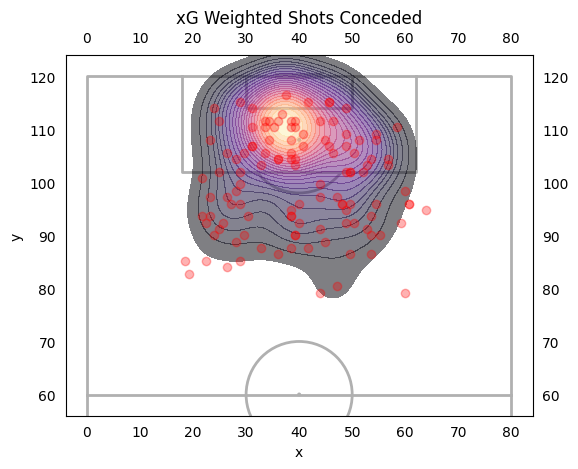

In [5]:
pitch = VerticalPitch(half=True, axis=True,label=True)
fig, ax = pitch.draw()
kde = sns.kdeplot(x=shots.get("x"),y=shots.get("y"),weights=shots.get("xG"),fill = True,shade_lowest = False,alpha = .5,n_levels = 25,cmap = "magma")
for i in range(shots.shape[0]):
    row = shots.iloc[i]
    plt.plot(row.get("x"),row.get("y"),'ro',alpha = .3)
plt.title("xG Weighted Shots Conceded")

Text(0.5, 1.0, 'Non-Weighted Shots Conceded')

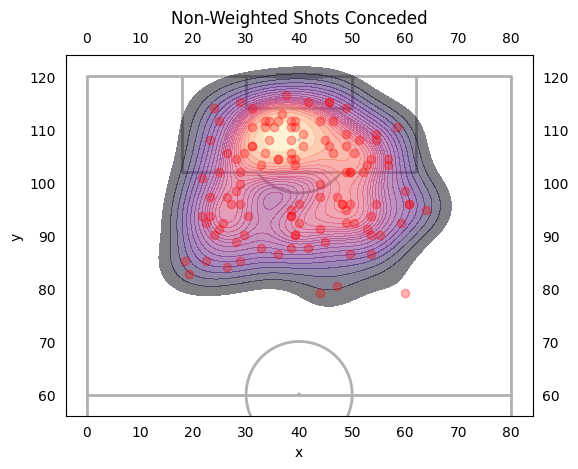

In [6]:
pitch = VerticalPitch(half=True, axis=True,label=True)
fig, ax = pitch.draw()
kde = sns.kdeplot(x=shots.get("x"),y=shots.get("y"),fill = True,shade_lowest = False,alpha = .5,n_levels = 25,cmap = "magma")
for i in range(shots.shape[0]):
    row = shots.iloc[i]
    plt.plot(row.get("x"),row.get("y"),'ro',alpha = .3)
plt.title("Non-Weighted Shots Conceded")

In [26]:
shots[(shots.get("x")>18)&(shots.get("x")<62)&(shots.get("y")>102)].shape[0]/shots.shape[0]

0.4576271186440678

In [27]:
shots[(shots.get("x")>18)&(shots.get("x")<62)&(shots.get("y")>102)].get("xG").sum()/shots.get("xG").sum()

0.7787091366303438

Text(0.5, 1.0, 'Goals Conceded')

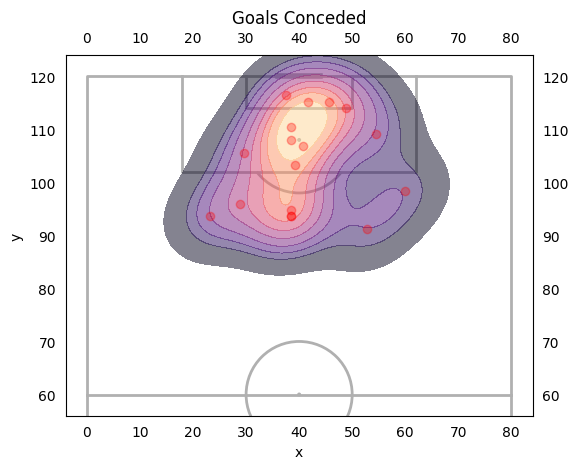

In [23]:
goals = shots[shots.get("isGoal")]
pitch = VerticalPitch(half=True, axis=True,label=True)
fig, ax = pitch.draw()
kde = sns.kdeplot(x=goals.get("x"),y=goals.get("y"),fill = True,shade_lowest = False,alpha = .5,n_levels = 10,cmap = "magma")
for i in range(goals.shape[0]):
    row = goals.iloc[i]
    plt.plot(row.get("x"),row.get("y"),'ro',alpha = .3)
plt.title("Goals Conceded")

Text(0.5, 1.0, 'xG Weighted Shots Conceded')

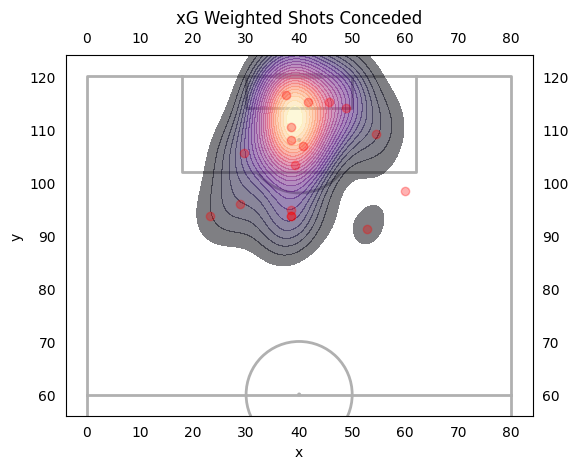

In [21]:
pitch = VerticalPitch(half=True, axis=True,label=True)
fig, ax = pitch.draw()
kde = sns.kdeplot(x=goals.get("x"),y=goals.get("y"),weights=goals.get("xG"),fill = True,shade_lowest = False,alpha = .5,n_levels = 25,cmap = "magma")
for i in range(goals.shape[0]):
    row = goals.iloc[i]
    plt.plot(row.get("x"),row.get("y"),'ro',alpha = .3)
plt.title("xG Weighted Shots Conceded")

Text(0.5, 1.0, 'Shots Conceded by Minute')

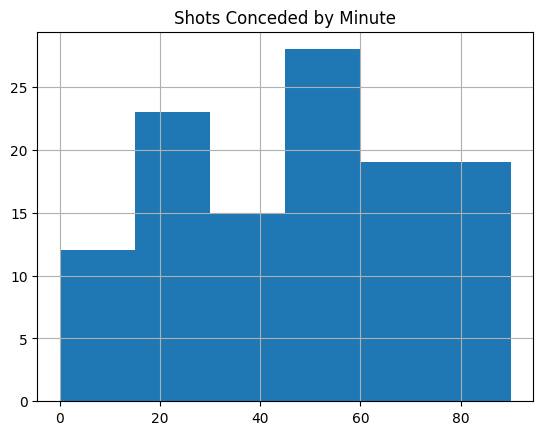

In [7]:
shots.hist(column="Min",bins = [0,15,30,45,60,75,90])
plt.title("Shots Conceded by Minute")

Text(0.5, 1.0, 'Shots Conceded by Minute Weighted by xG')

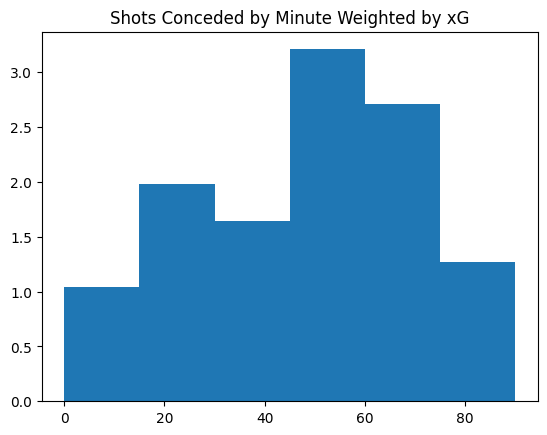

In [8]:
plt.hist(shots.get("Min"),weights=shots.get("xG"),bins = np.arange(0,105,15))
plt.title("Shots Conceded by Minute Weighted by xG")